# Decompose composed time series

In [86]:
from utilities.std_imports import *
import matplotlib
from datetime import datetime
matplotlib.rcParams['figure.figsize'] = (26,8)
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy import fftpack
from numpy import fft
from time_series.stationarity.stationarity import *
from scipy import signal

In [3]:
df = pd.read_csv(ts_path + 'synth1.csv')
df['value'].astype(float)
df.index= pd.to_datetime(df['Unnamed: 0'])
ts = df['value']

### Auto decomposition

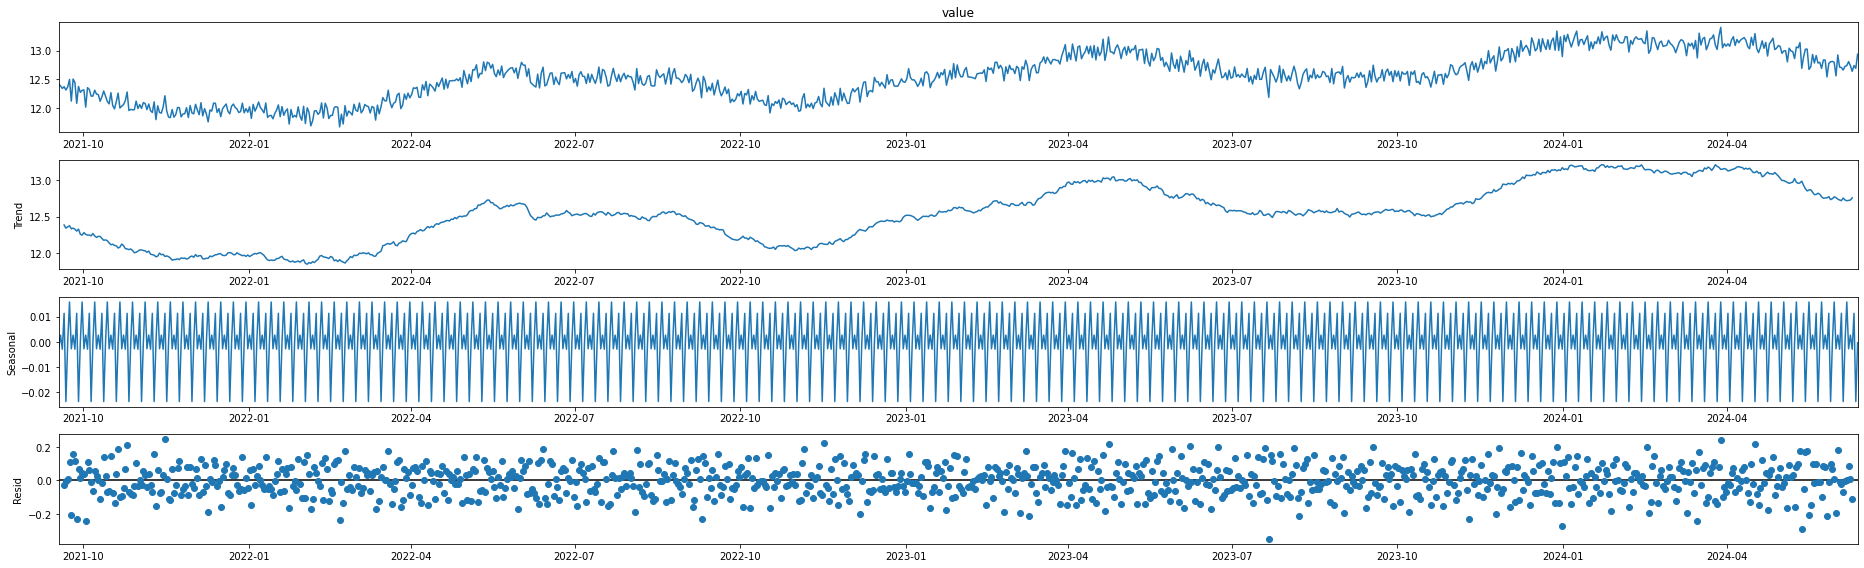

In [99]:
res = seasonal_decompose(ts, model='additive')
res.plot();

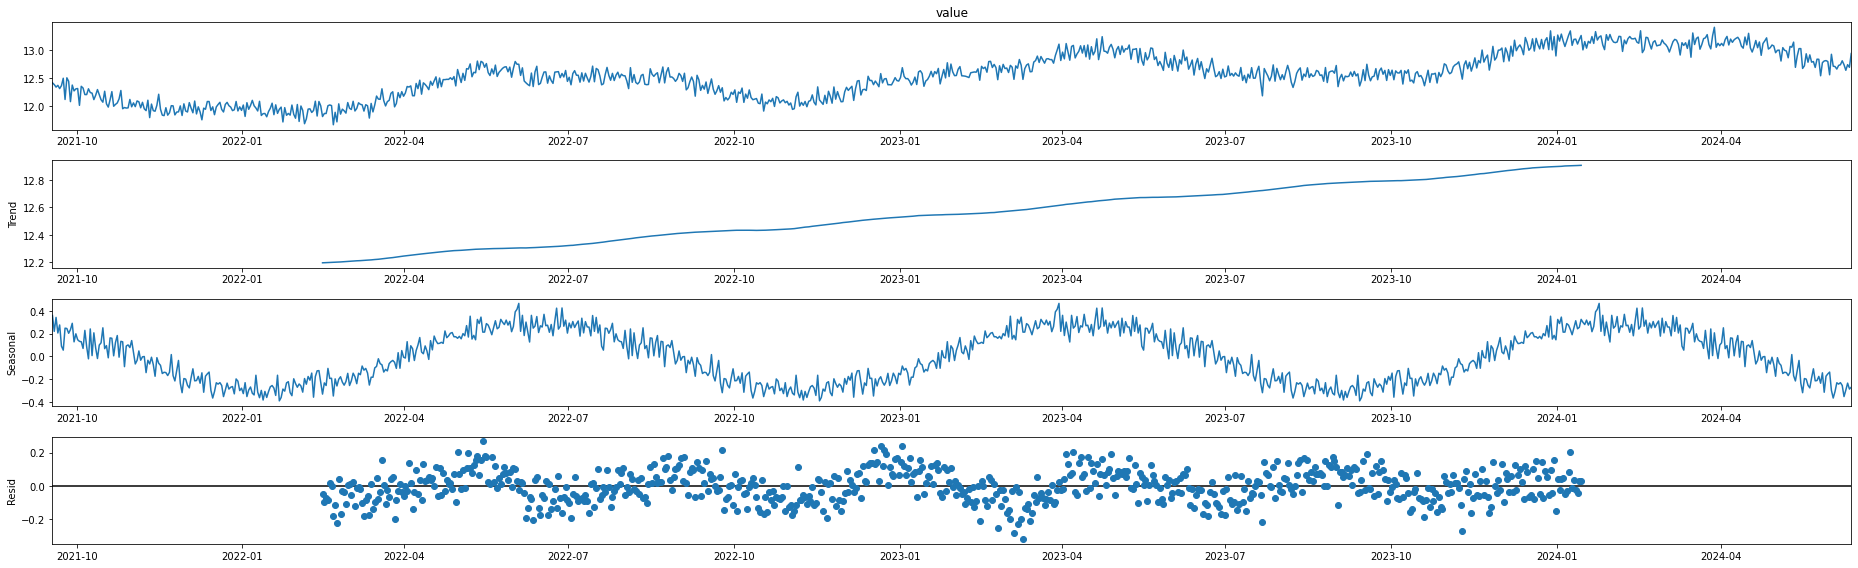

In [100]:
res = seasonal_decompose(ts, model='additive', period=300)
res.plot();

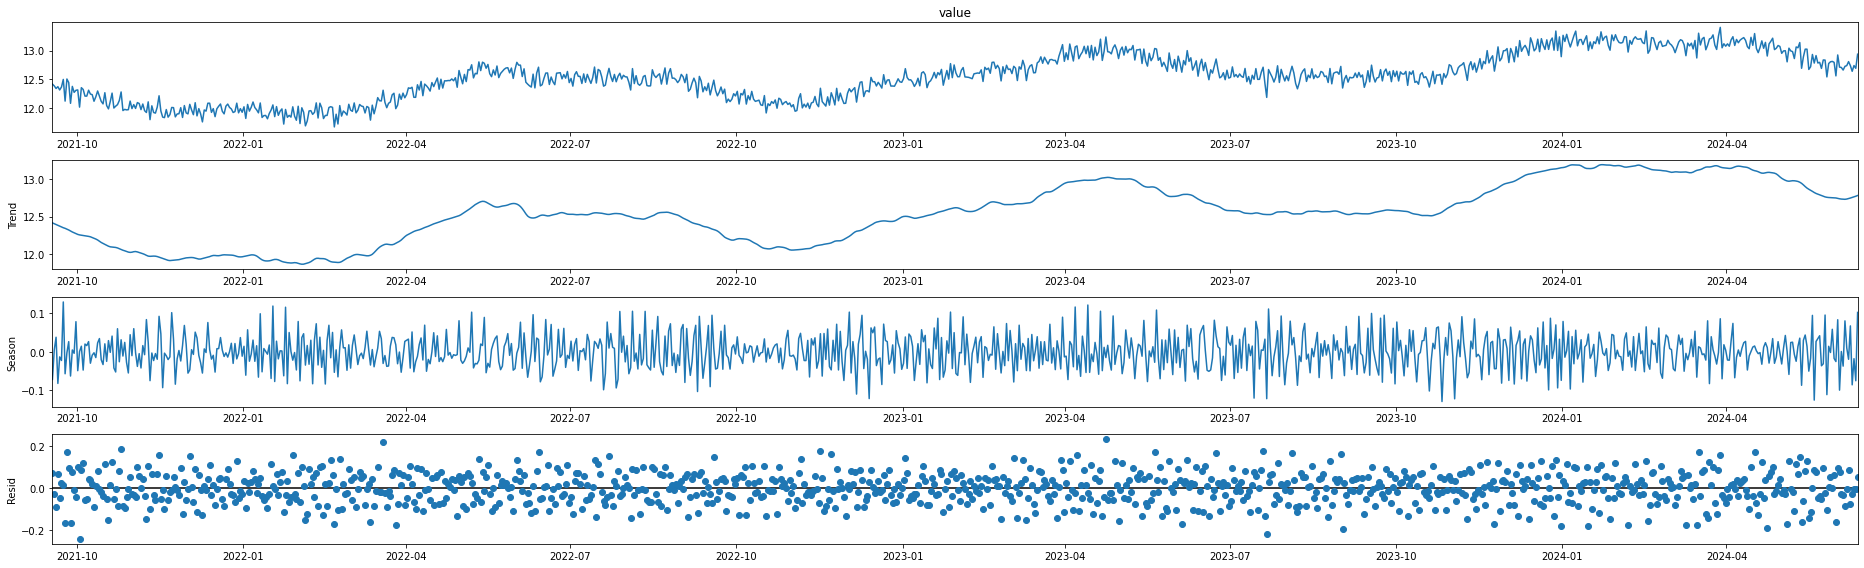

In [145]:
result = STL(ts).fit()
chart = result.plot()
plt.show()

### Manual decomposition

### Trend first

a =  0.001
b =  12.011


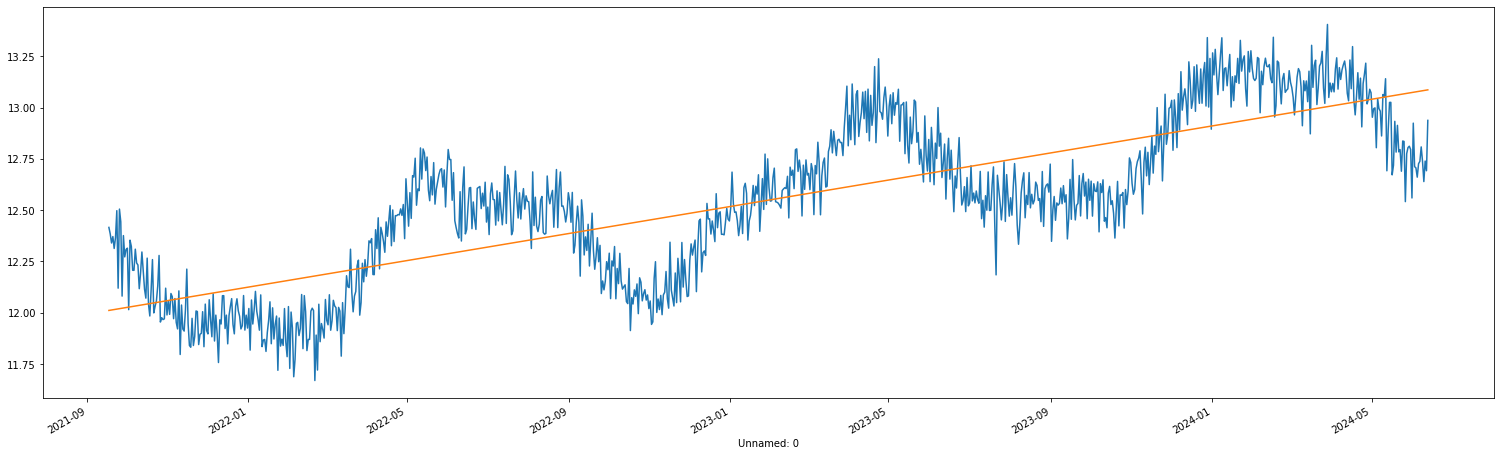

In [44]:
x = np.arange(0,len(ts))
y=np.array(ts)
z = np.polyfit(x,y,1)
trend = z[0]* x + z[1]
print('a = ', round(z[0],3))
print('b = ', round(z[1],3))
trend = pd.Series(trend, index=ts.index)
ts.plot()
trend.plot();


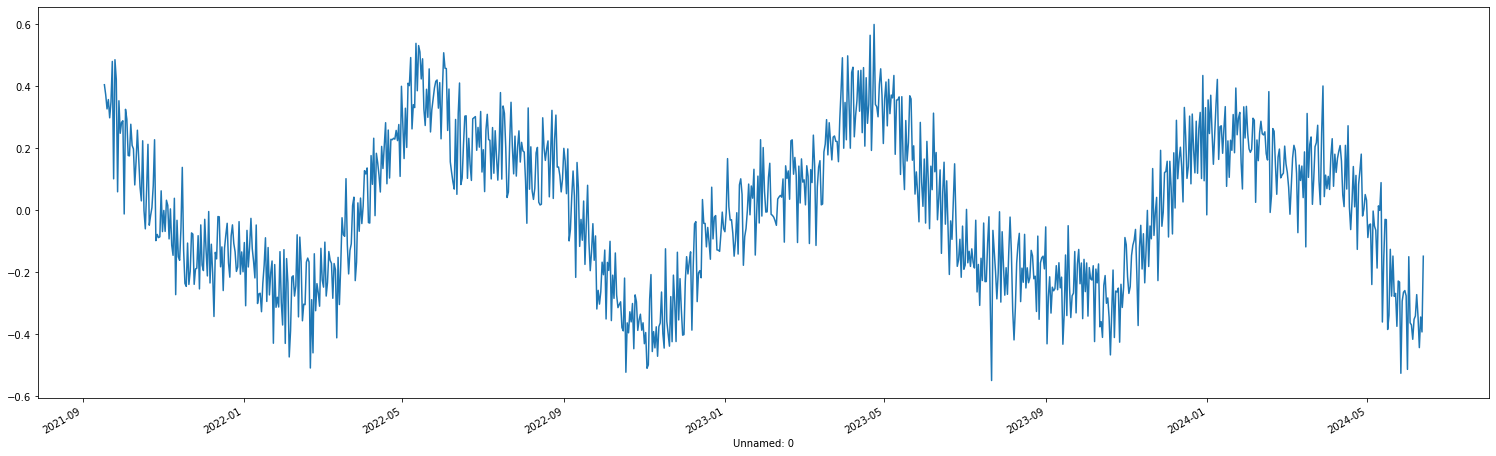

In [47]:
detr = ts-trend
detr.plot();

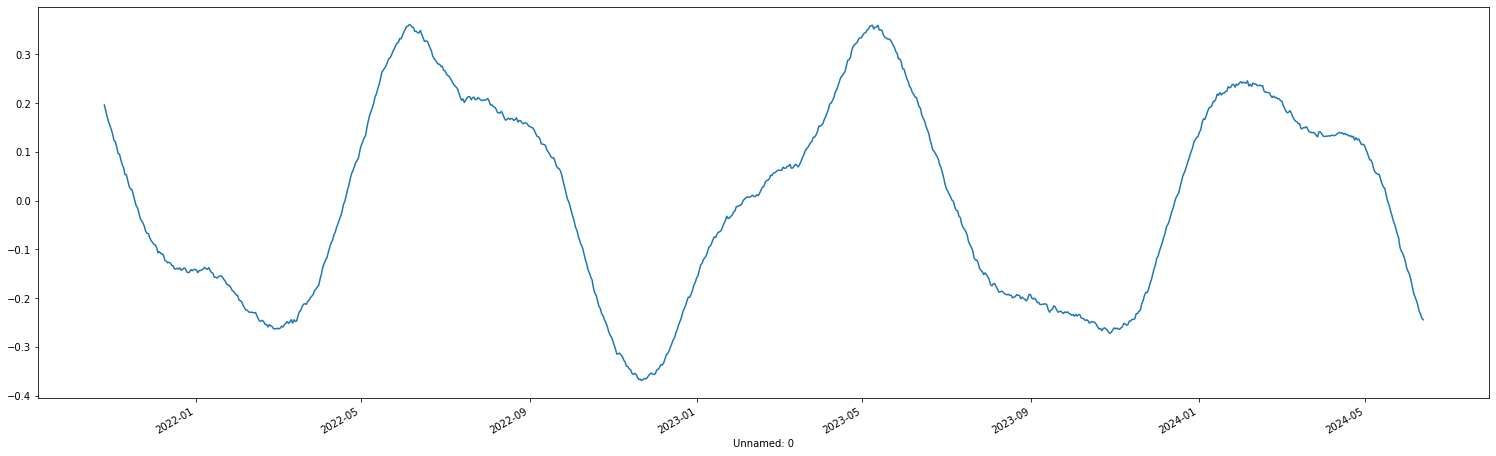

In [72]:
denoi = detr.rolling(40).mean()
denoi.plot();

c:\program files\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


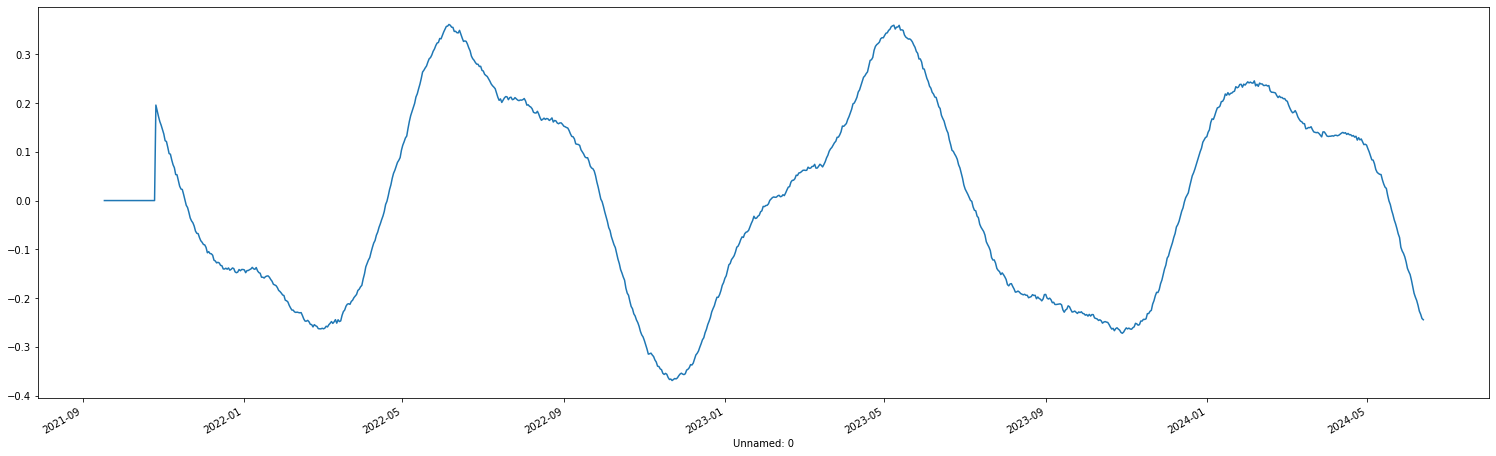

In [83]:
denoi_arr = np.array(denoi.fillna(0))
denoi_fft = fftpack.fft(denoi_arr)
denoi_fft_inv = fftpack.ifft(denoi_fft)
denoi_fft_inv = pd.Series(denoi_fft_inv, index= ts.index)
#denoi.plot()
denoi_fft_inv.plot();

In [87]:
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 10                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
 

c:\program files\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
c:\program files\python38\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


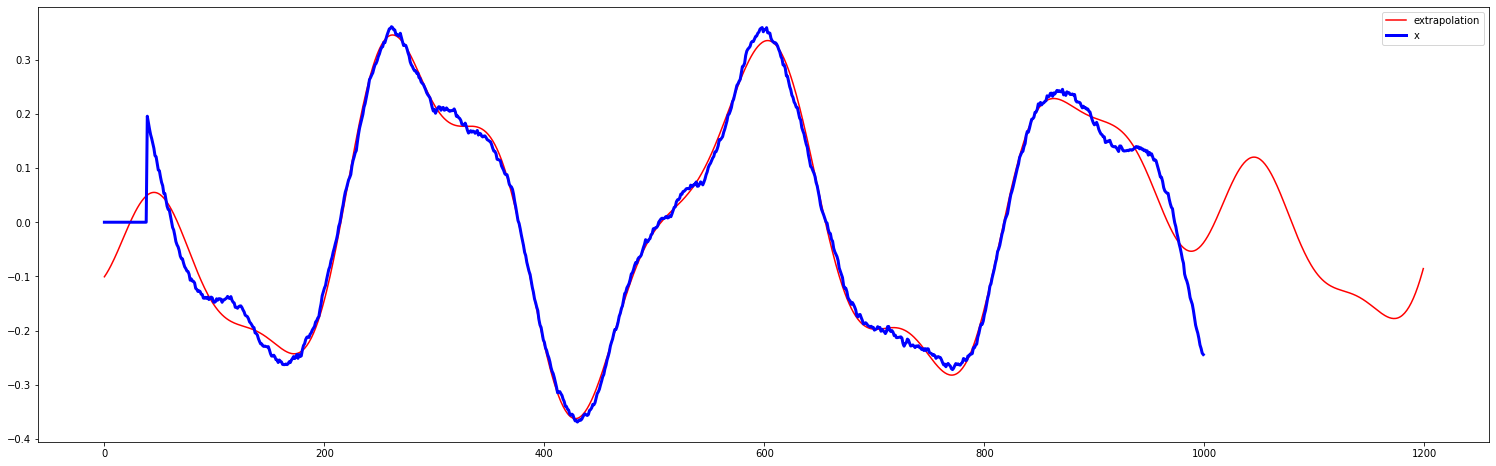

In [91]:
x = np.array(denoi_fft_inv)
n_predict = 200
extrapolation = fourierExtrapolation(x, n_predict)

plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
plt.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
plt.legend();

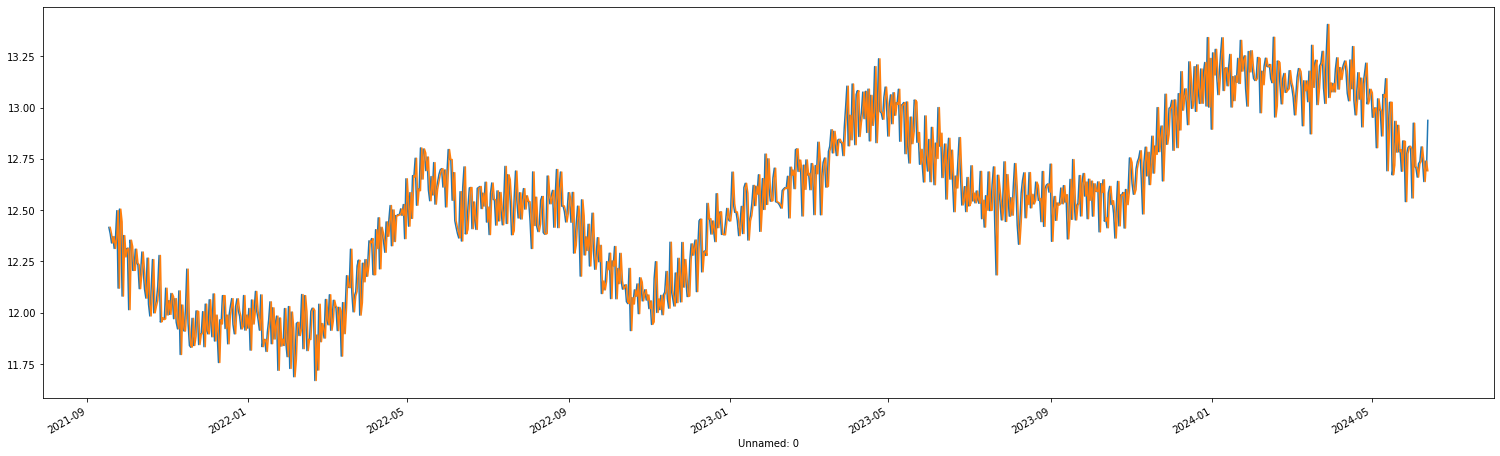

In [25]:
ts_d1 = ts.diff(periods=1)
#ts_d1.plot();
ts.plot()
(ts - ts_d1).plot();

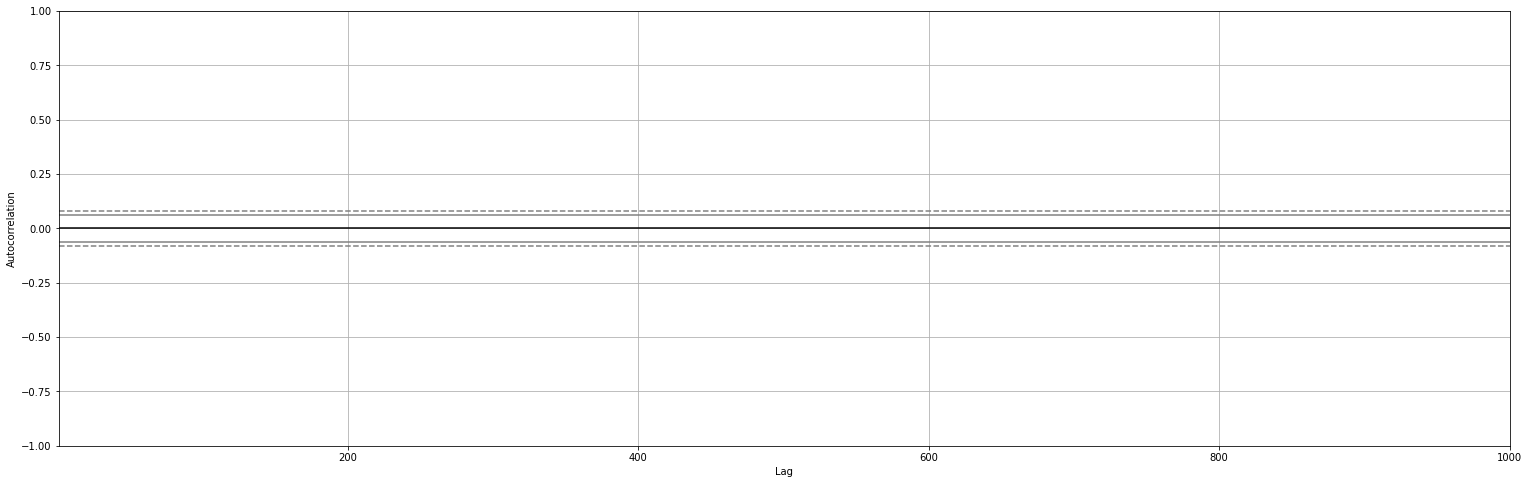

In [155]:
pd.plotting.autocorrelation_plot(ts_d1);

p-value:	 0.4182308930649136


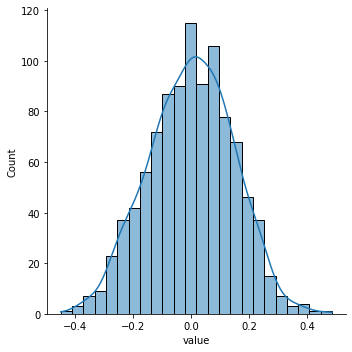

In [114]:
res = adfuller(ts)
print('p-value:\t' , res[1])
ts_dist(ts=ts_d1, nsplit=1)

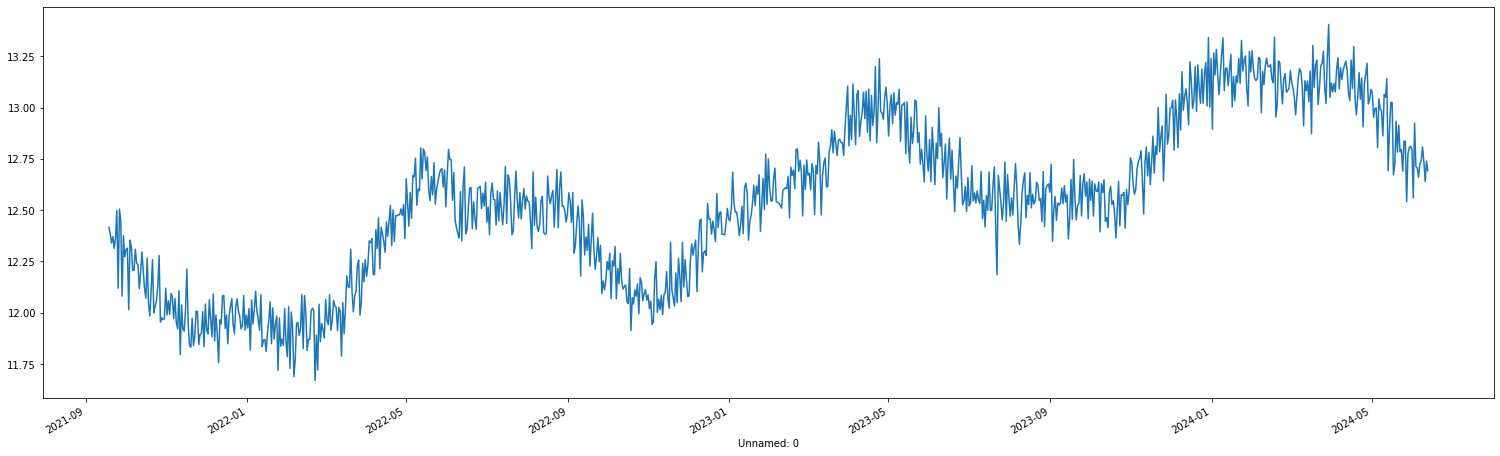

In [117]:
ts_tr = ts - ts_d1
ts_tr.plot();

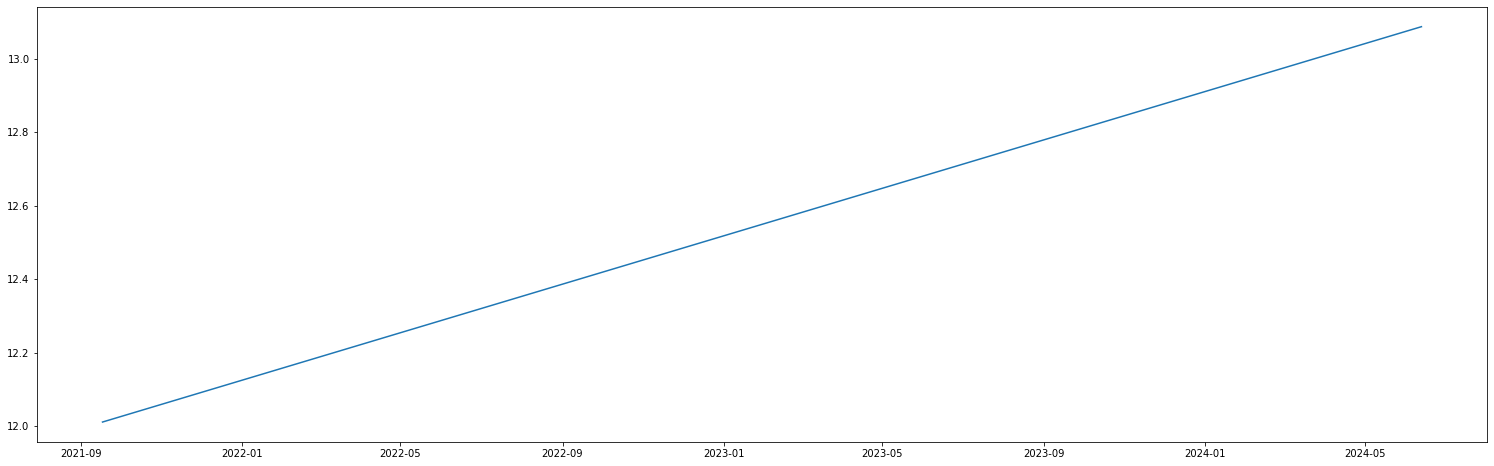

In [151]:
ts_no = signal.detrend(ts)
ts_tr = ts - ts_no
plt.plot(ts_tr);

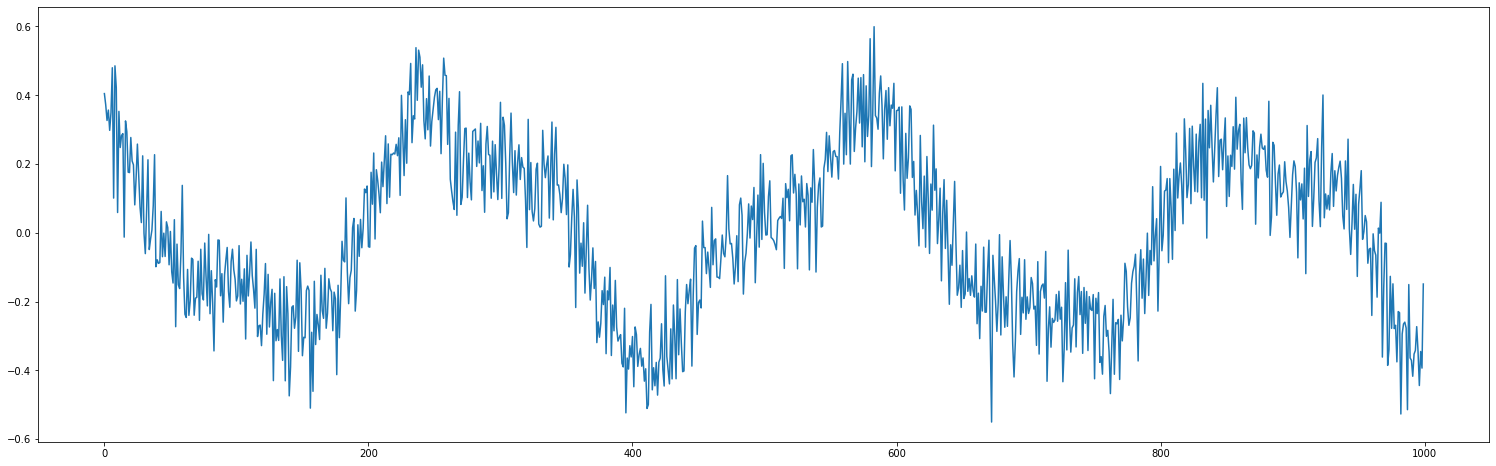

In [154]:
plt.plot(ts_no);

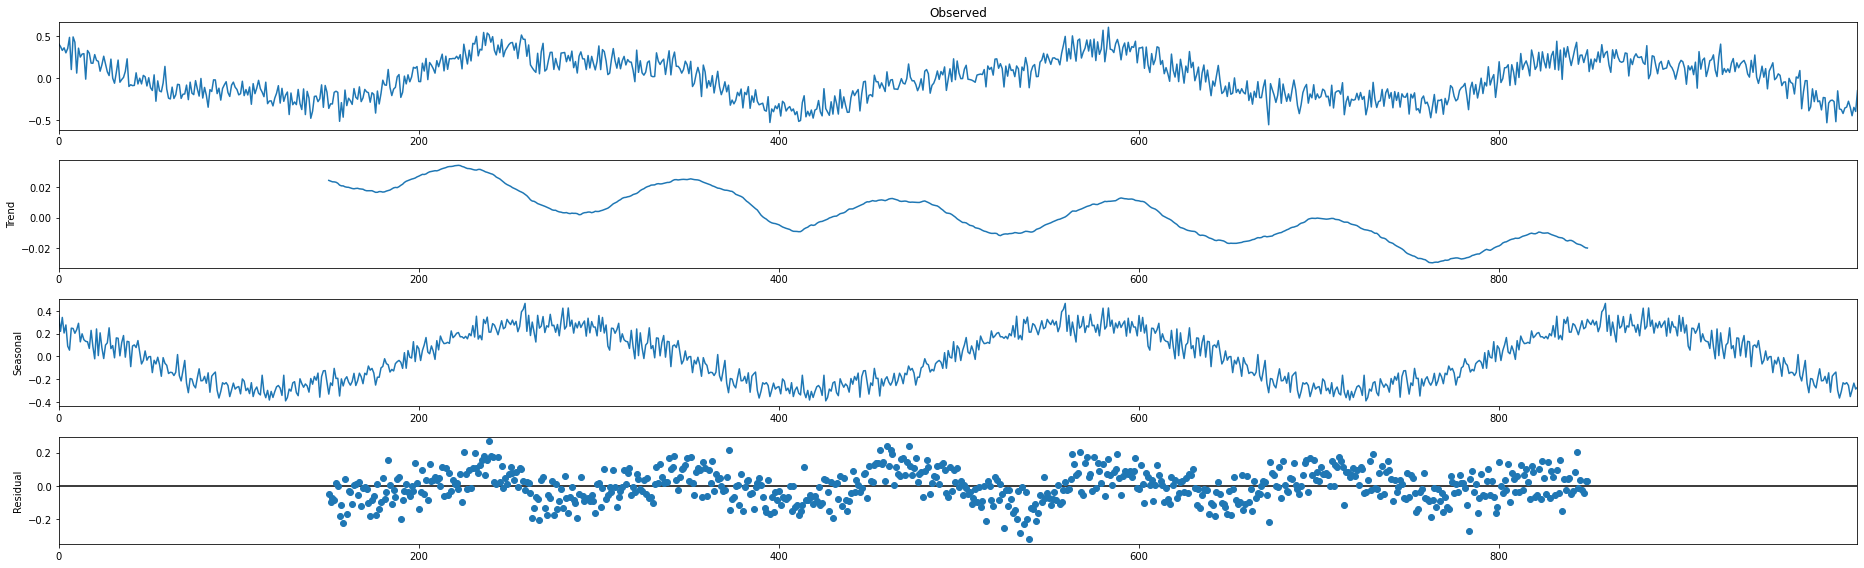

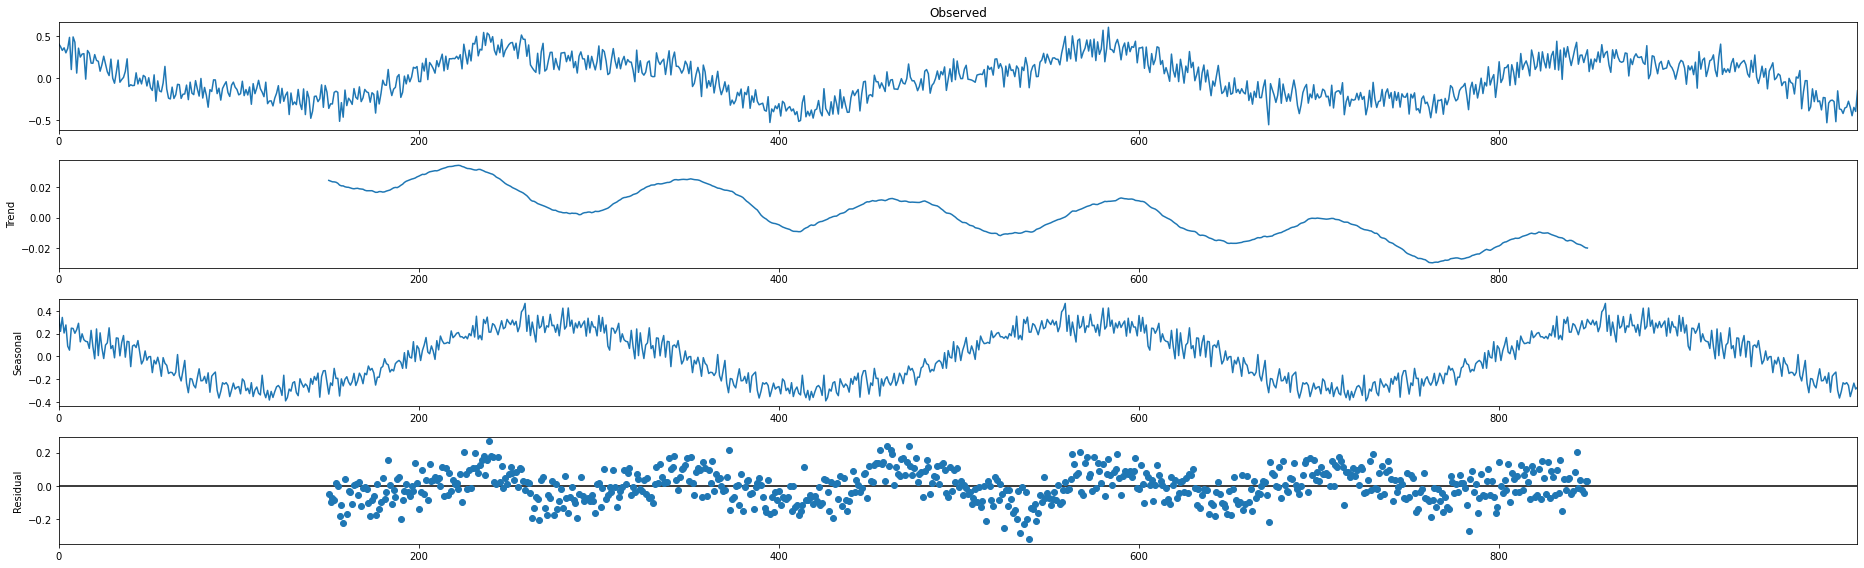

In [157]:
ts_seas = seasonal_decompose(ts_no, model='additive', period=300)
ts_seas.plot()

### Seasonality first

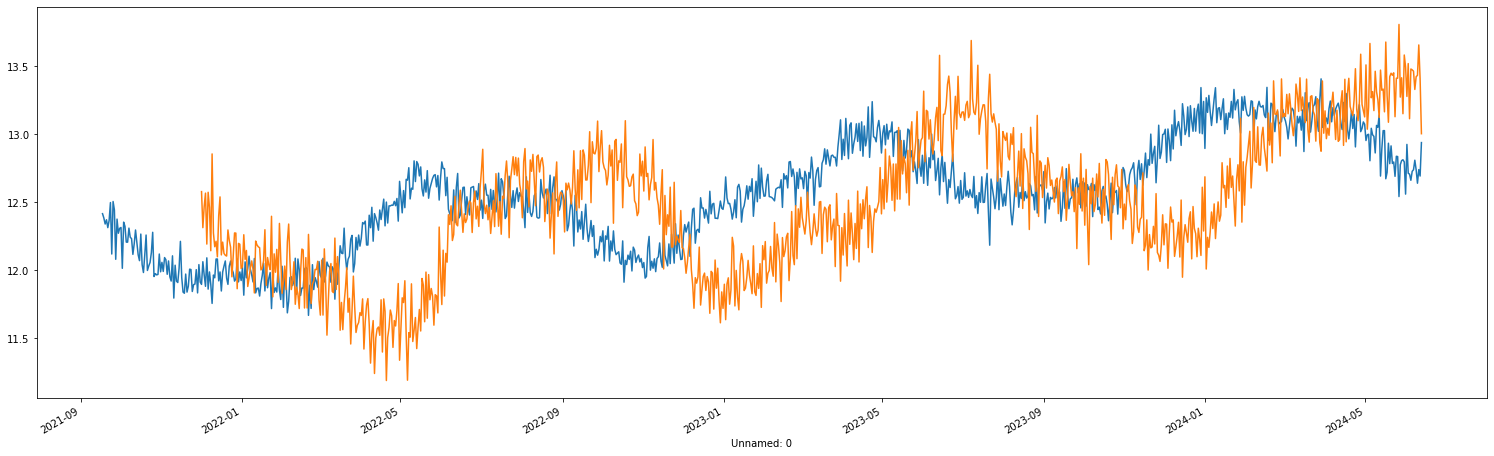

In [20]:
ts_d1 = ts.diff(periods=75)
ts_d2 = ts.diff(periods=30)
ts_d = ts_d1 + ts_d2
#ts_d.plot();
ts.plot()
(ts - ts_d).plot();

### Credits & Links

https://towardsai.net/p/machine-learning/seasonality-detection-with-fast-fourier-transform-fft-and-python